In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
%matplotlib inline
plt.style.use("ggplot")

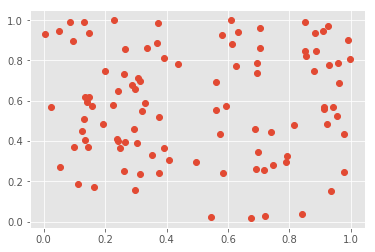

In [3]:
# ああああ
x = np.random.rand(100)
y = np.random.rand(100)
plt.plot(x,y, 'o')

In [4]:
# あああああああ

In [7]:
ad_data = pd.read_csv("R/ad_result.csv")
ad_data.head()

,month,tvcm,magazine,install
0,2013-01,6358,5955,53948
1,2013-02,8176,6069,57300
2,2013-03,6853,5862,52057
3,2013-04,5271,5247,44044
4,2013-05,6473,6365,54063


Text(0,0.5,'new install')

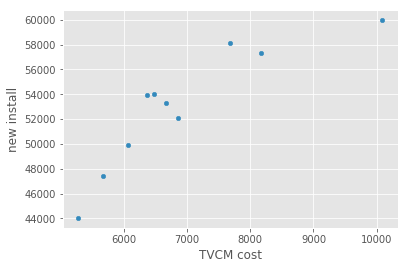

In [9]:
ad_data.plot(x = "tvcm", y = "install", kind = "scatter")
plt.xlabel("TVCM cost")
plt.ylabel("new install")

Text(0,0.5,'new install')

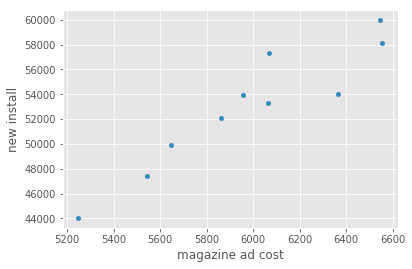

In [10]:
ad_data.plot(x = "magazine", y = "install", kind = "scatter")
plt.xlabel("magazine ad cost")
plt.ylabel("new install")

In [12]:
#回帰分析
model = smf.ols(formula = 'install ~ tvcm + magazine', data = ad_data)
result = model.fit()
result.params

Intercept    188.174275
tvcm           1.360921
magazine       7.249809
dtype: float64

In [13]:
result.summary()

/Users/TomohikoIto/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                install   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     52.86
Date:                Wed, 08 Aug 2018   Prob (F-statistic):           5.97e-05
Time:                        01:27:37   Log-Likelihood:                -84.758
No. Observations:                  10   AIC:                             175.5
Df Residuals:                       7   BIC:                             176.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    188.1743   7719.131      0.024      0.981   -1.81e+04    1.84e+04
tvcm           1.3609      0.517      2.630      0.034       0.137       2.584
magazine       7.2498      1.693      4.283      0.004       3.247      11.252
==============================================================================
Omnibus:                        0.992   Durbin-Watson:                   0.881
Prob(Omnibus):                  0.609   Jarque-Bera (JB):                0.795
Skew:                           0.534   Prob(JB):                        0.672
Kurtosis:                       2.124   Cond. No.                     1.63e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
X = np.array(ad_data[['tvcm', 'magazine']])
y = np.array(ad_data['install'])

model = LinearRegression().fit(X, y)
print(model.intercept_)
print(model.coef_)

188.174274830395
[1.3609213  7.24980915]


In [18]:
print(model.score(X, y))

0.9379014301044469
